In [41]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [3]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

### Load the torchvision.datasets.MNIST() train and test datasets.

In [6]:
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform= ToTensor(),
                            target_transform=None)

test_data = datasets.MNIST(root="data",
                            train=False,
                            download=True,
                            transform= ToTensor(),
                            target_transform=None)

In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [12]:
# printing first training data
print(train_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [13]:
image, label = train_data[0]

In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
label

5

(-0.5, 27.5, 27.5, -0.5)

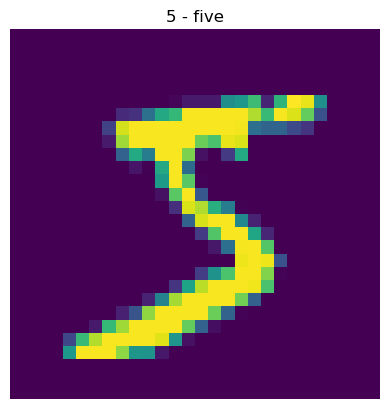

In [25]:
# Visualizing a single image from a data
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

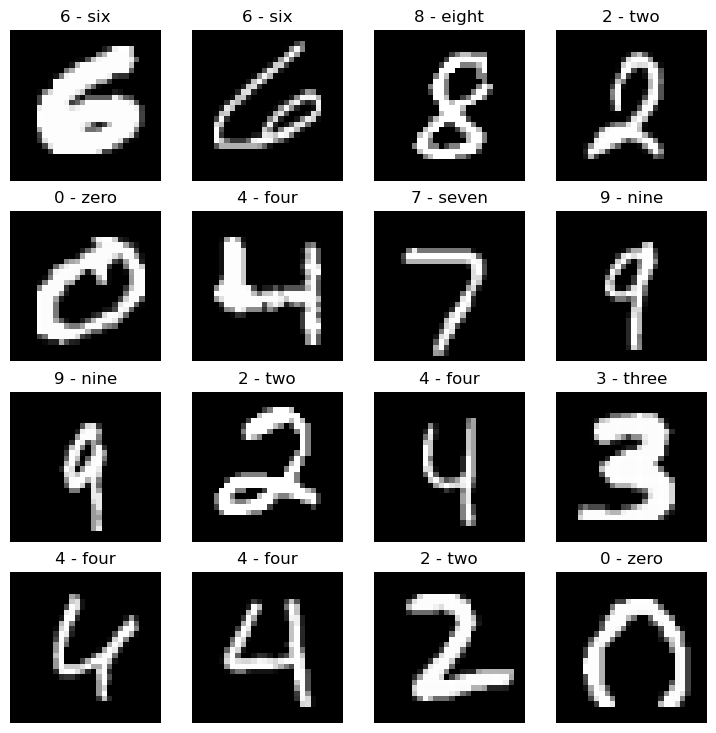

In [40]:
# Visualizing some random images from our training sample
torch.manual_seed(42)

rows = 4
cols = 4
fig = plt.figure(figsize=(9,9))

for i in range(16):
    random = torch.randint(len(train_data), size=[1]).item()
    image, label = train_data[random]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
